In [19]:
import numpy as np

def grad_clip(grads,max_norm):
  norm = np.sqrt(np.sum(grads*grads))
  r = max_norm / norm
  if r < 1:
    clipped_grads = grads * r
  return clipped_grads

a = np.array([[3,4]])
max_norm = 4
print(grad_clip(a,4))

[[2.4 3.2]]


In [20]:
n_rnn = 10
batch_size = 8
epochs = 50
n_in = 1
n_mid = 20
n_out = 1

In [21]:
import matplotlib.pyplot as plt

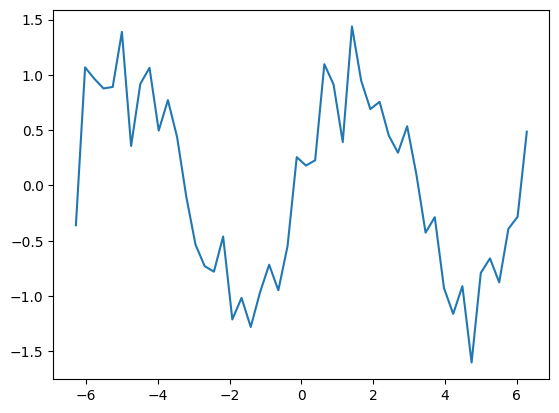

(40, 10, 1)
(40, 10, 1)


In [22]:
x_data = np.linspace(-2*np.pi,2*np.pi)
sin_data = np.sin(x_data) + 0.3 * np.random.randn(len(x_data))

plt.plot(x_data,sin_data)
plt.show()

n_sample = len(x_data) - n_rnn
x = np.zeros((n_sample,n_rnn))
t = np.zeros((n_sample,n_rnn))

for i in range(0,n_sample):
  x[i] = sin_data[i:i+n_rnn]
  t[i] = sin_data[i+1:i+n_rnn+1]

x = x.reshape(n_sample,n_rnn,1)
print(x.shape)
t = t.reshape(n_sample,n_rnn,1)
print(t.shape)

In [23]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from keras import optimizers

1/1 [==============================] - 0s 19ms/step


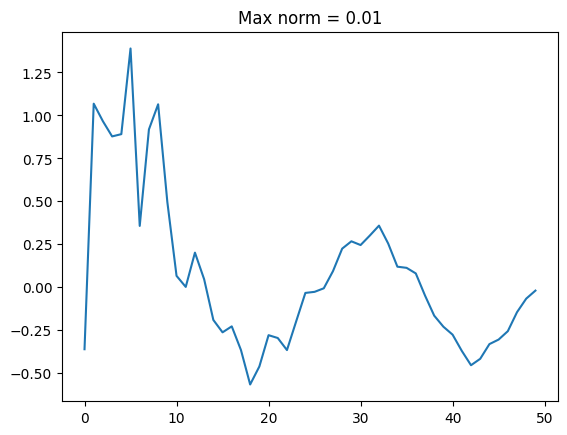

1/1 [==============================] - 0s 21ms/step


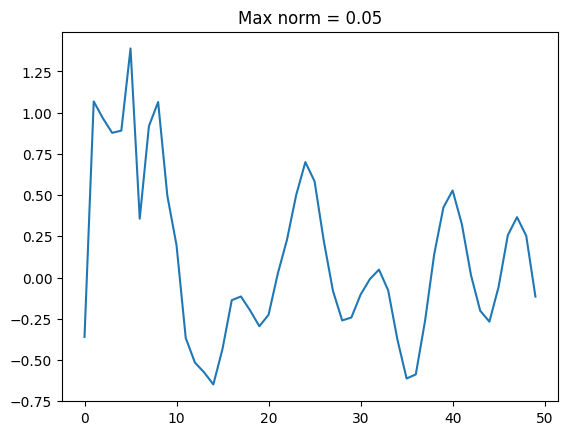

1/1 [==============================] - 0s 27ms/step


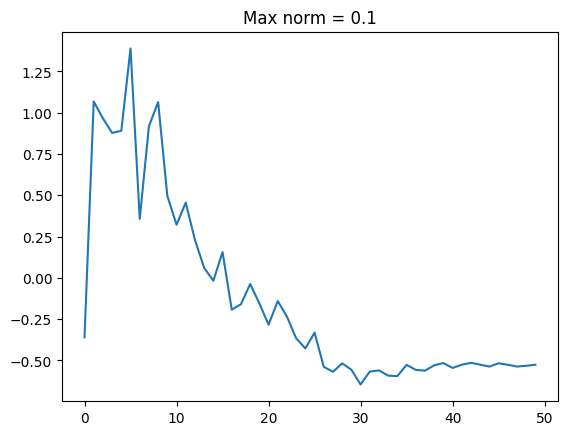

1/1 [==============================] - 0s 24ms/step


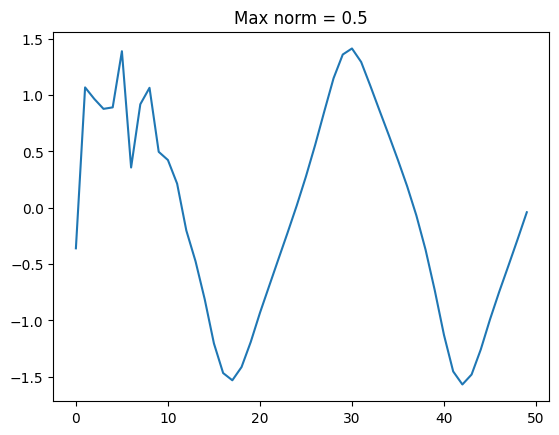

1/1 [==============================] - 0s 18ms/step


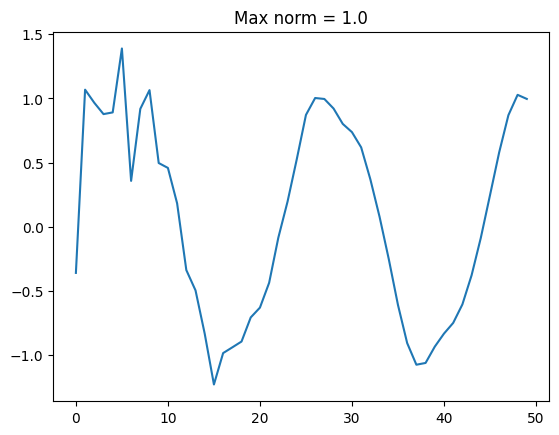

In [24]:
for max_norm in [0.01,0.05,0.1,0.5,1.0]:
  model = Sequential()
  model.add(SimpleRNN(n_mid,input_shape=(n_rnn,n_in),return_sequences=True))
  model.add(Dense(n_out,activation="linear"))
  model.compile(loss="mean_squared_error",optimizer=optimizers.SGD(clipnorm=max_norm))
  history = model.fit(x,t,epochs=epochs,batch_size=batch_size,verbose=0)

  predicted = x[0].reshape(-1)
  for i in range(0,n_sample):
    y = model.predict(predicted[-n_rnn:].reshape(1,-1,1))
    predicted = np.append(predicted,y[0][n_rnn-1][0])
  
  plt.plot(np.arange(len(predicted)),predicted)
  plt.title("Max norm = " + str(max_norm))
  plt.show()